In [62]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np

from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import pickle
import requests
import os

style.use('ggplot')


In [8]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,'lxml')
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers, f)
        
    return tickers

In [9]:
save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

In [53]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle','rb') as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    a = 0
    for ticker in tickers:
        try:
            
            if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            else:
                print('Already have {}'.format(ticker))
                
        except Exception:
            a += 1
    print(a)

            

In [55]:
get_data_from_yahoo()


data of 26 companies not received


In [59]:
def compile_data():
    with open('sp500tickers.pickle','rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)


            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count%10==0:
                print(count)
        except Exception:
            pass
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
        
compile_data()

0
10
20
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
410
420
430
440
450
460
470
480
490
500
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  27.854319  6.757675   NaN  18.25000  NaN  1.245554  16.145748   
2000-01-04  26.747520  6.564601   NaN  17.81250  NaN  1.207666  14.791295   
2000-01-05  27.522274  6.552534   NaN  18.00000  NaN  1.212402  15.083735   
2000-01-06  29.735863  6.781809   NaN  18.03125  NaN  1.188722  15.206868   
2000-01-07  30.326138  6.854216   NaN  17.93750  NaN  1.221874  15.945663   

               AMD  AAP        AES ...   WLTW  WYNN       XEL        XRX  \
Date                               ...                                     
2000-01-03  15.500  NaN  30.286739 ...    NaN   NaN  8.177794  55.400860   
2000-01-04  14.625  NaN  29.085716 ...    NaN   Na

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.948626  0.917590  0.793535  0.966675  0.926923  0.930757   
ABT   0.948626  1.000000  0.870608  0.722083  0.960316  0.889726  0.878065   
ABBV  0.917590  0.870608  1.000000  0.758086  0.782810  0.740370  0.868343   
ABMD  0.793535  0.722083  0.758086  1.000000  0.860758  0.864955  0.872125   
ACN   0.966675  0.960316  0.782810  0.860758  1.000000  0.939226  0.924783   

           AMD       AAP       AES    ...         WLTW      WYNN       XEL  \
MMM  -0.521923  0.967229 -0.290799    ...     0.877940  0.659864  0.941822   
ABT  -0.601495  0.958861 -0.247201    ...     0.811535  0.737949  0.946977   
ABBV  0.188658  0.896813  0.056811    ...     0.804627 -0.303637  0.792071   
ABMD -0.247162  0.844651  0.022127    ...     0.684755  0.295920  0.830728   
ACN  -0.511405  0.963566  0.040392    ...     0.845872  0.664848  0.980970   

           XRX        XL       XYL       YUM       ZBH      ZI

/Users/yueyuchen/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


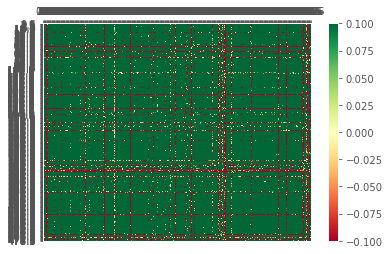

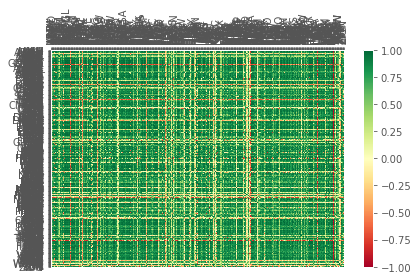

In [64]:
def visiualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
visiualize_data()